<a href="https://colab.research.google.com/github/samsonjoy025-a11y/Data-science-and-Machine-Learning-Projects/blob/main/Insurance_claim_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies and Libraries

In [ ]:
# Importing  python data analysis libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from aklearn.ensemble import RandomForestClassifier

!pip install scikit-learn

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

Data Collection and Preprocessing

In [ ]:
# Train dataset collection
import pandas as pd
train_data = pd.read_csv('/content/Train_data.csv')

In [ ]:
# Printing the first five rows
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [ ]:
# Printing the last five rows
train_data.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0
7159,H7470,2014,1.000000,0,V,V,V,U,NaN,1,2004.0,.,NaN,0


In [ ]:
# Get the number of rows and columns
train_data.shape

(7160, 14)

In [ ]:
# Gettting the statistical measures of this DataFrame
train_data.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [ ]:
# Getting the number of missing values
train_data.isnull().sum()

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,7
Settlement,0
Building Dimension,106
Building_Type,0


In [ ]:
# finding the percentage of missing values
train_data.isnull().mean() * 100


,0
Customer Id,0.000000
YearOfObservation,0.000000
Insured_Period,0.000000
Residential,0.000000
Building_Painted,0.000000
Building_Fenced,0.000000
Garden,0.097765
Settlement,0.000000
Building Dimension,1.480447
Building_Type,0.000000


In [ ]:
# Train Data Outcome Dataset
train_data['Claim'].value_counts()

,count
Claim,
0,5526
1,1634


In [ ]:
# finding the summary of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [ ]:
# filling in the missing values using the mean of numeric columns
train_data.fillna(train_data.mean(numeric_only=True), inplace=True)

Visual Distribution (Histogram)

In [ ]:
# visual Distribution
import matplotlib.pyplot as plt
import seaborn as sns


### Visualizing Distributions of Numerical Features

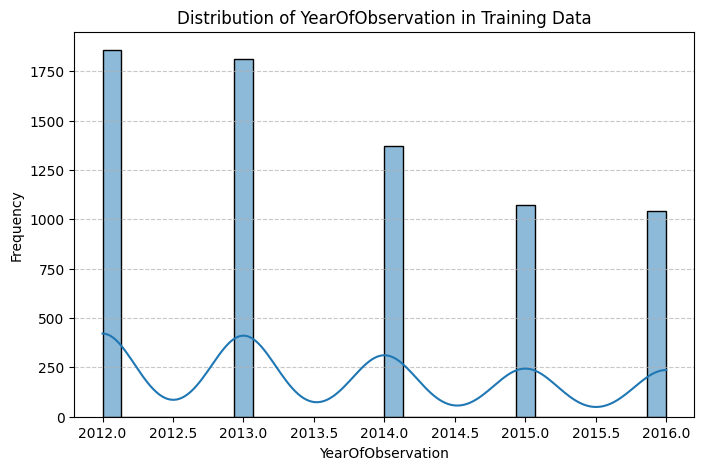

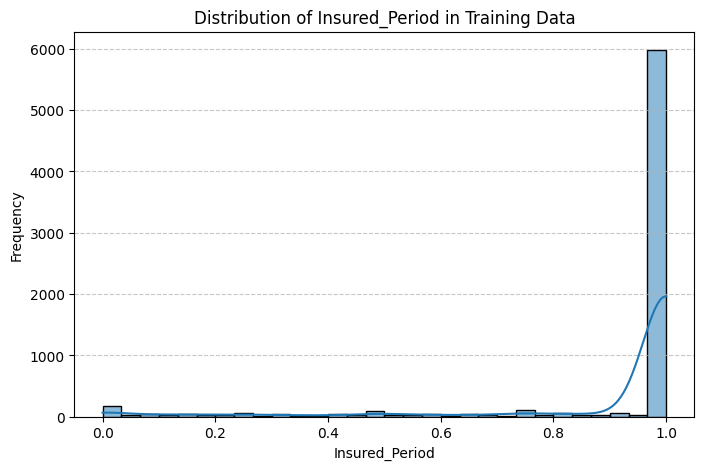

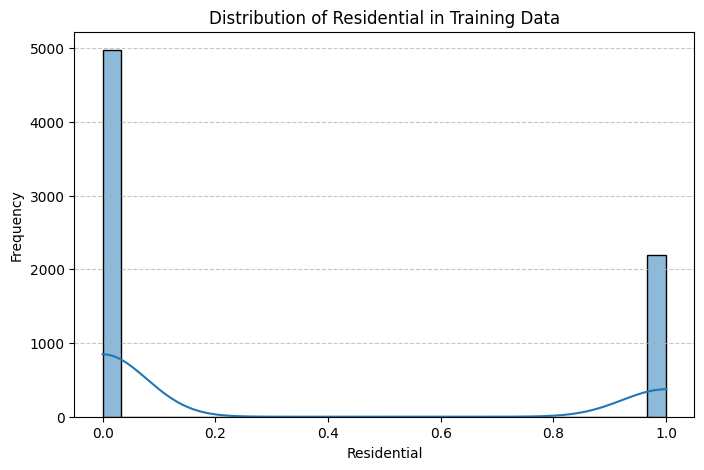

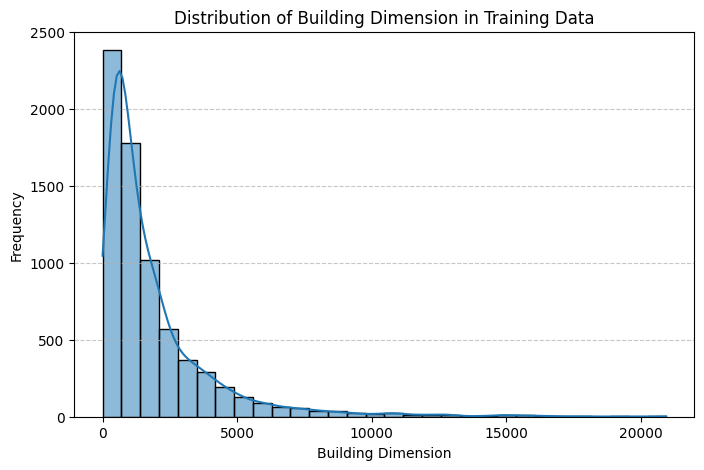

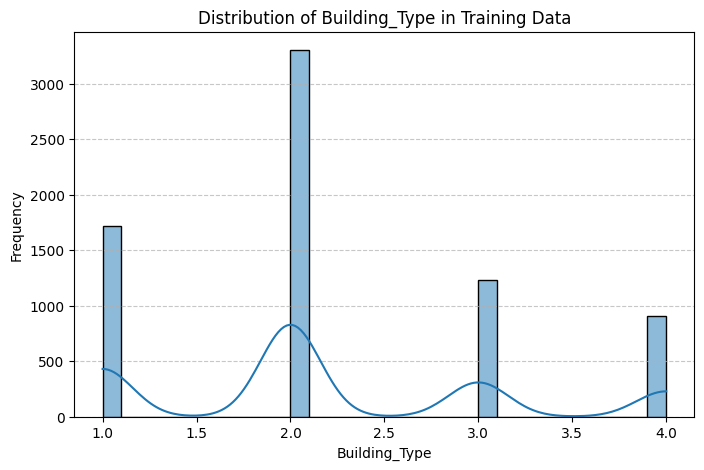

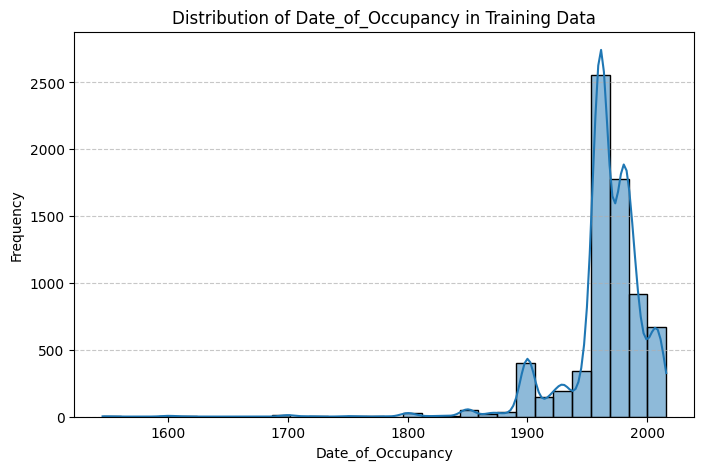

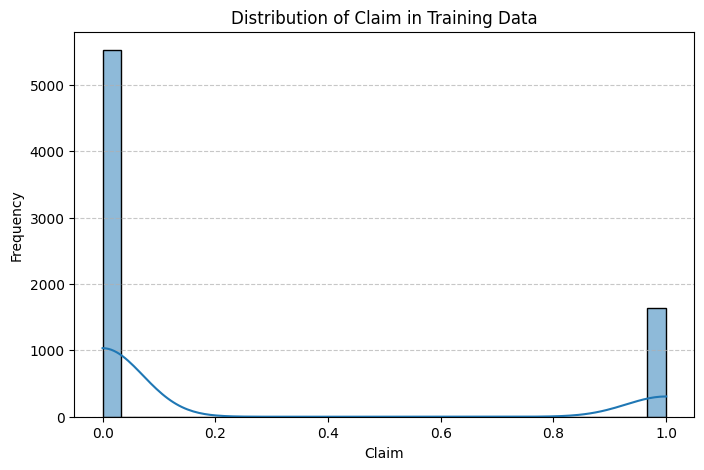

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns in the raw train_data for plotting
train_numeric_cols = train_data.select_dtypes(include=['number']).columns

# Create histograms for each numerical column
for col in train_numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_data[col], kde=True, bins=30)  # Histogram with KDE
    plt.title(f'Distribution of {col} in Training Data')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Boxplot for Outliers

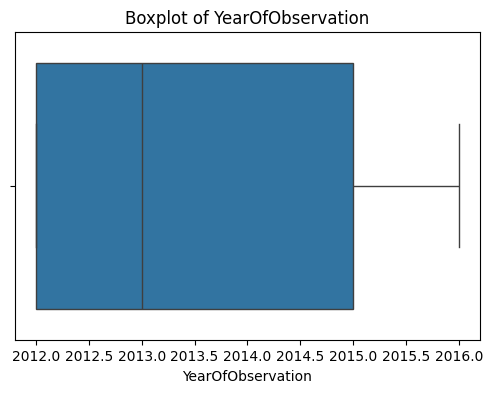

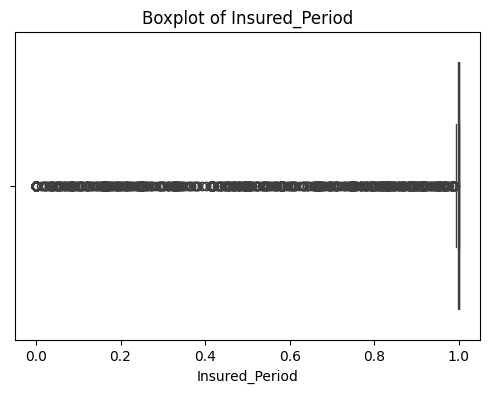

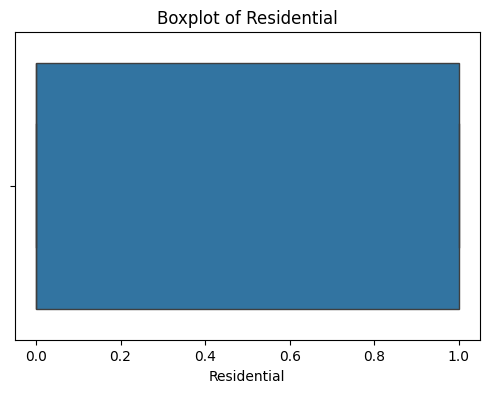

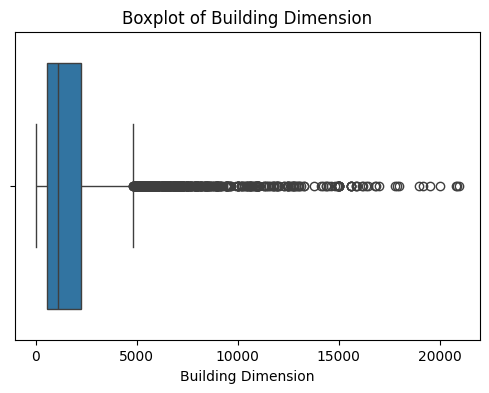

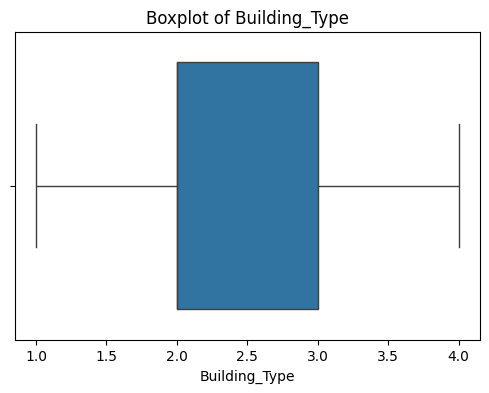

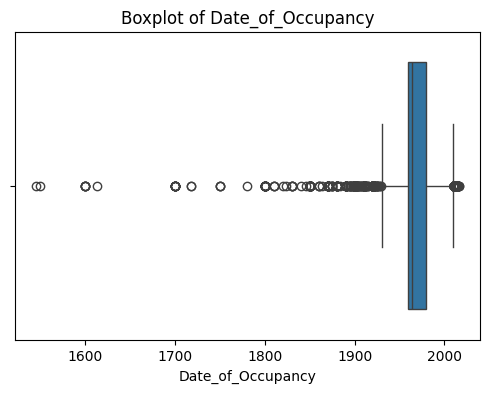

In [ ]:
# Boxplot for outliers
import matplotlib.pyplot as plt
import seaborn as sns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Combininng with targets

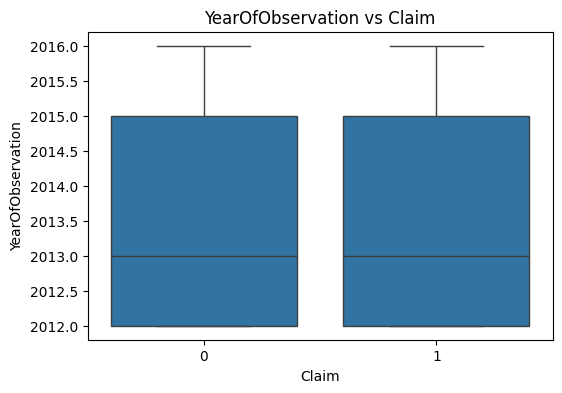

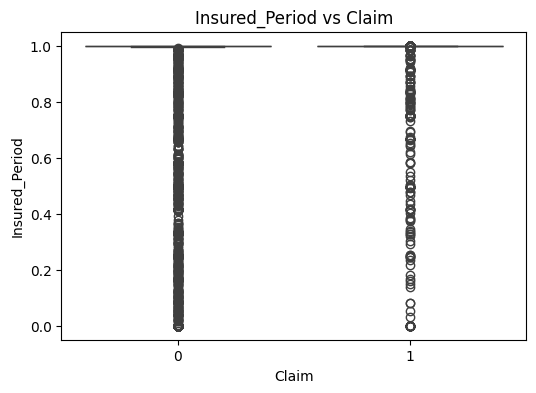

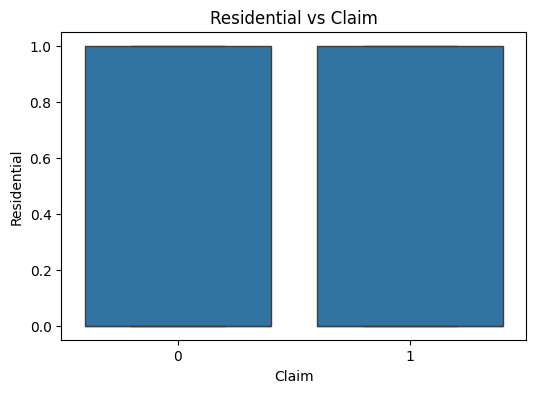

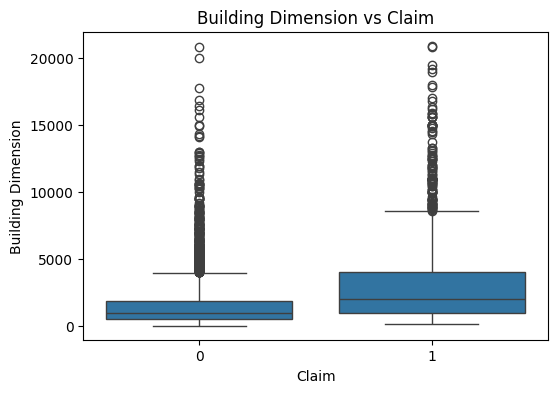

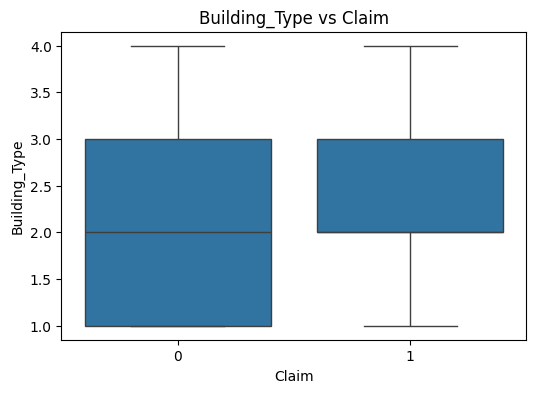

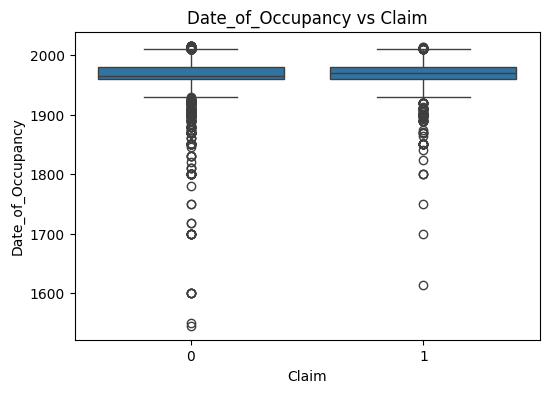

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y, y=train_data[col])
    plt.title(f'{col} vs Claim')
    plt.show()

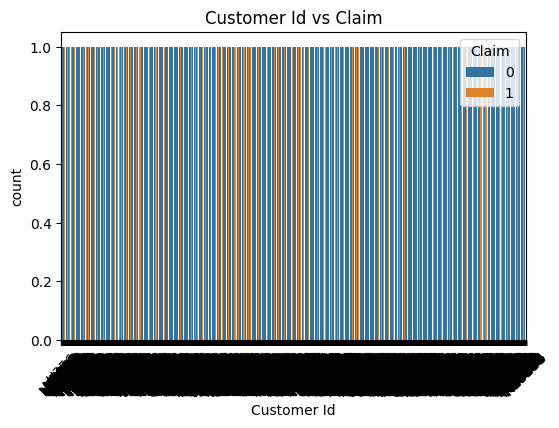

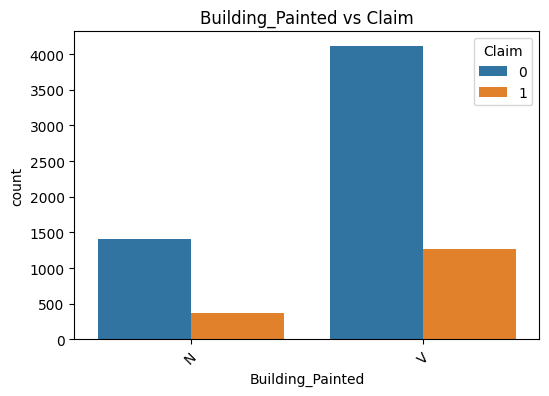

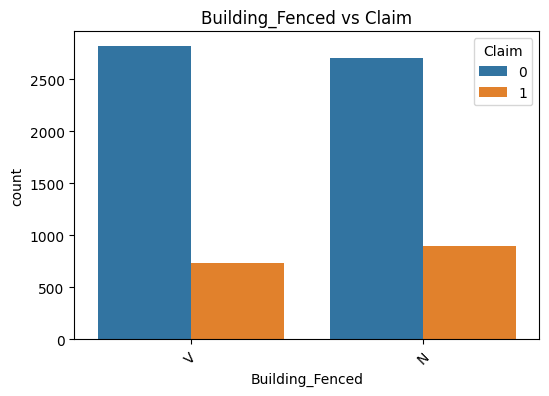

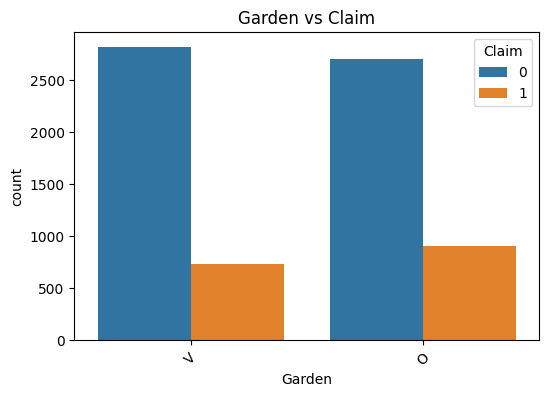

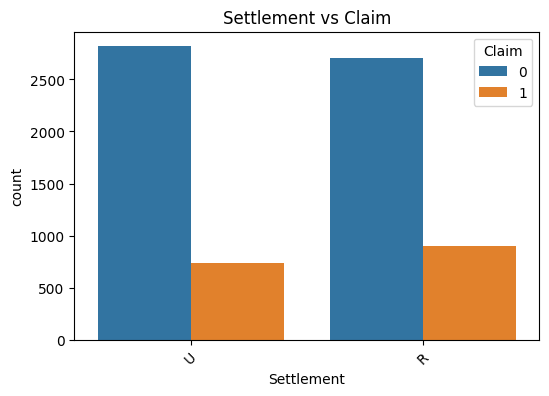

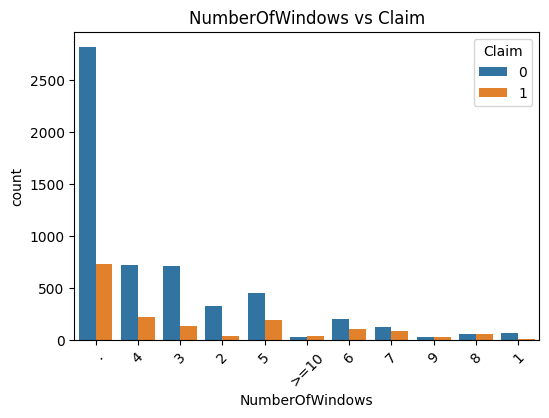

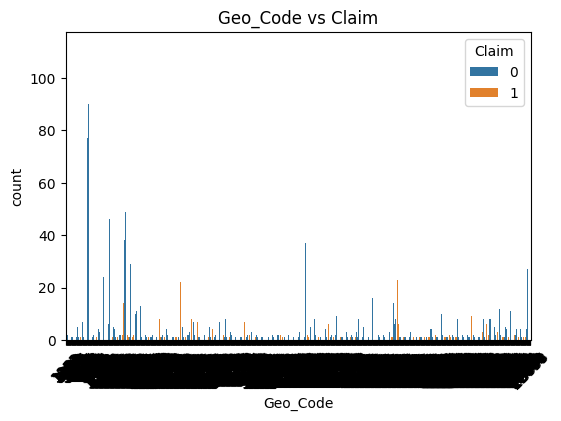

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=train_data[col], hue=y)
    plt.title(f'{col} vs Claim')
    plt.xticks(rotation=45)
    plt.show()

1 if the building has at least a claim over the insured period.
0 if the building doesn’t have a claim over the insured period.



In [ ]:
# Finding the mean value
train_data['Claim'].mean()

np.float64(0.2282122905027933)

In [ ]:
# find the mean value
train_data.groupby('Claim').mean(numeric_only=True)

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy
Claim,,,,,,
0,2013.681868,0.898193,0.289540,1520.754125,2.128664,1964.106641
1,2013.627907,0.948870,0.359241,3111.261826,2.380049,1965.639261


Separating Data and Label

In [ ]:
# separaating data and labels
X = train_data.drop(columns = 'Claim', axis=1)
Y = train_data['Claim']

In [ ]:
print(X)

     Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H14663               2013        1.000000            0   
1          H2037               2015        1.000000            0   
2          H3802               2014        1.000000            0   
3          H3834               2013        1.000000            0   
4          H5053               2014        1.000000            0   
...          ...                ...             ...          ...   
7155       H5290               2012        1.000000            1   
7156       H5926               2013        1.000000            0   
7157       H6204               2016        0.038251            0   
7158       H6537               2013        1.000000            0   
7159       H7470               2014        1.000000            0   

     Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                   N               V      V          U           290.00000   
1                   V    

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
7155    0
7156    1
7157    0
7158    0
7159    0
Name: Claim, Length: 7160, dtype: int64


In [ ]:
# check missing values in target
Y.isnull().sum()

np.int64(0)

Feature Preprocessing

Identify Column Types

In [ ]:
# identify column types
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy'],
      dtype='object')
Categorical Columns: Index(['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden',
       'Settlement', 'NumberOfWindows', 'Geo_Code'],
      dtype='object')


Handle Missing Values in Features

Numerical columns: fill with median (robust to outliers)

Categorical columns: fill with mode (most frequent value)

In [ ]:
# Handling missing vaalues in columns
# numerical imputer
from sklearn.impute import SimpleImputer
numeric_imputer = SimpleImputer(strategy='median')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])


In [ ]:
# categorical imputer
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])

Encode Categorical Features

In [ ]:
# Encoding Categorical Features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
print(X)

     Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H14663             2013.0        1.000000          0.0   
1          H2037             2015.0        1.000000          0.0   
2          H3802             2014.0        1.000000          0.0   
3          H3834             2013.0        1.000000          0.0   
4          H5053             2014.0        1.000000          0.0   
...          ...                ...             ...          ...   
7155       H5290             2012.0        1.000000          1.0   
7156       H5926             2013.0        1.000000          0.0   
7157       H6204             2016.0        0.038251          0.0   
7158       H6537             2013.0        1.000000          0.0   
7159       H7470             2014.0        1.000000          0.0   

     Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                   N               V      V          U           290.00000   
1                   V    

Scale Numerical Features

In [ ]:
# Standardscale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [ ]:
# Pipeline: scale numerical + one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [ ]:
# Apply the preprocessor to transform the data
X = preprocessor.fit_transform(X)


In [ ]:
# X already contains the transformed, scaled, and encoded data
standardized_data = X

print(standardized_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 93080 stored elements and shape (7160, 8492)>
  Coords	Values
  (0, 0)	-0.48389584766940974
  (0, 1)	0.3764189038169288
  (0, 2)	-0.6631551732684415
  (0, 3)	-0.7048551085276832
  (0, 4)	-1.2609778950647434
  (0, 5)	-0.12843127907400764
  (0, 1082)	1.0
  (0, 7166)	1.0
  (0, 7169)	1.0
  (0, 7171)	1.0
  (0, 7173)	1.0
  (0, 7174)	1.0
  (0, 7192)	1.0
  (1, 0)	0.9615335512930324
  (1, 1)	0.3764189038169288
  (1, 2)	-0.6631551732684415
  (1, 3)	-0.6164014556858118
  (1, 4)	-1.2609778950647434
  (1, 5)	-3.2985748333862706
  (1, 4062)	1.0
  (1, 7167)	1.0
  (1, 7168)	1.0
  (1, 7170)	1.0
  (1, 7172)	1.0
  (1, 7178)	1.0
  :	:
  (7158, 1)	0.3764189038169288
  (7158, 2)	-0.6631551732684415
  (7158, 3)	2.48094530642493e-17
  (7158, 4)	-1.2609778950647434
  (7158, 5)	0.21740256321460283
  (7158, 6630)	1.0
  (7158, 7167)	1.0
  (7158, 7169)	1.0
  (7158, 7171)	1.0
  (7158, 7173)	1.0
  (7158, 7174)	1.0
  (7158, 7795)	1.0
  (7159, 0)	0.23881885

In [ ]:
x = standardized_data
y = train_data['Claim']
print(x)
print(y)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 93080 stored elements and shape (7160, 8492)>
  Coords	Values
  (0, 0)	-0.48389584766940974
  (0, 1)	0.3764189038169288
  (0, 2)	-0.6631551732684415
  (0, 3)	-0.7048551085276832
  (0, 4)	-1.2609778950647434
  (0, 5)	-0.12843127907400764
  (0, 1082)	1.0
  (0, 7166)	1.0
  (0, 7169)	1.0
  (0, 7171)	1.0
  (0, 7173)	1.0
  (0, 7174)	1.0
  (0, 7192)	1.0
  (1, 0)	0.9615335512930324
  (1, 1)	0.3764189038169288
  (1, 2)	-0.6631551732684415
  (1, 3)	-0.6164014556858118
  (1, 4)	-1.2609778950647434
  (1, 5)	-3.2985748333862706
  (1, 4062)	1.0
  (1, 7167)	1.0
  (1, 7168)	1.0
  (1, 7170)	1.0
  (1, 7172)	1.0
  (1, 7178)	1.0
  :	:
  (7158, 1)	0.3764189038169288
  (7158, 2)	-0.6631551732684415
  (7158, 3)	2.48094530642493e-17
  (7158, 4)	-1.2609778950647434
  (7158, 5)	0.21740256321460283
  (7158, 6630)	1.0
  (7158, 7167)	1.0
  (7158, 7169)	1.0
  (7158, 7171)	1.0
  (7158, 7173)	1.0
  (7158, 7174)	1.0
  (7158, 7795)	1.0
  (7159, 0)	0.23881885

Split Data into Train and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
# splitting data into  train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
# finding the shape of X train and test  DataFrame
print(X.shape, X_train.shape, X_test.shape)

(7160, 8492) (5728, 8492) (1432, 8492)


Train the model

In [ ]:
from sklearn.linear_model import LogisticRegression
# training the model
model = LogisticRegression()

In [ ]:
# Train the logistic Regression Model  with training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

In [ ]:
# model evaluation of training data
from sklearn.metrics import accuracy_score
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8423533519553073


In [ ]:
# model evaluation of test data
from sklearn.metrics import accuracy_score
# accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8009776536312849


Making a Predictive System

In [ ]:
# making a predictive system
import numpy as np
# X is a sparse matrix (csr_matrix), so use indexing directly
input_data = X[0] # This gets the first row as a 1xN sparse matrix

prediction = model.predict(input_data)
print(prediction)
if (prediction[0] == 0):
  print('Building has no insurance claim  ')
else:
  print('Building has at least one insurance claim')

[0]
Building has no insurance claim  


In [ ]:
# making a predictive system
import numpy as np
# X is a sparse matrix (csr_matrix), so use indexing directly
input_data = X[1] # This gets the second row as a 1xN sparse matrix

prediction = model.predict(input_data)
print(prediction)
if (prediction[0] == 0):
  print('Building has no insurance claim  ')
else:
  print('Building has at least one insurance claim')

[0]
Building has no insurance claim  


In [ ]:
# making a predictive system
import numpy as np
# To check the second row of the tail rows from the original data
# train_data.tail() shows rows from index 7155 to 7159.
# The second row of these tail rows corresponds to index 7156.
input_data = X[7156] # This gets the row at index 7156 as a 1xN sparse matrix

prediction = model.predict(input_data)
print(prediction)
if (prediction[0] == 0):
  print('Not Claimed')
else:
  print('Claimed')

[0]
Not Claimed


In [ ]:
# making a predictive system
import numpy as np
# X is a sparse matrix (csr_matrix), so use indexing directly
input_data = X[5] # This gets the sixth row as a 1xN sparse matrix

prediction = model.predict(input_data)
print(prediction)
if (prediction[0] == 1):
  print(' Claimed')
else:
  print('Not Claimed')

[0]
Not Claimed


Training with RandomForest

In [9]:
# training with RandomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [17]:
# RandomForest Training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd # Assuming train_data is available

# Ensure x and y are defined by replicating necessary preprocessing steps

# Load train_data - this was missing
train_data = pd.read_csv('/content/Train_data (2).csv')

# 1. Initial separation of features and target
X_raw = train_data.drop(columns = 'Claim', axis=1)
y = train_data['Claim']

# 2. Identify column types
numeric_cols = X_raw.select_dtypes(include=['number']).columns
categorical_cols = X_raw.select_dtypes(include=['object']).columns

# 3. Create preprocessing pipeline with imputation, scaling, and encoding
# Imputation: Numerical with median, Categorical with most_frequent
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_full = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer_pipeline, categorical_cols)
    ],
    remainder='passthrough' # Ensure all columns are handled
)

# 4. Apply the full preprocessor to transform the raw features
x = preprocessor_full.fit_transform(X_raw)

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [18]:
# model train evaluation
from sklearn.metrics import accuracy_score
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9998254189944135


In [19]:
# model test evaluation
from sklearn.metrics import accuracy_score
# accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7995810055865922


Model Predictive Syatem

In [21]:
# making a predictive system
import numpy as np
# x is a sparse matrix (csr_matrix), so use indexing directly
input_data = x[1] # This gets the second row as a 1xN sparse matrix

prediction = model.predict(input_data)
print(prediction)
if (prediction[0] == 0):
  print('Building has no insurance claim  ')
else:
  print('Building has at least one insurance claim')

[0]
Building has no insurance claim  


In [24]:
# making a predictive system
import numpy as np
# x is a sparse matrix (csr_matrix), so use indexing directly
input_data = x[2] # This gets the third row as a 1xN sparse matrix

prediction = model.predict(input_data)
print(prediction)
if (prediction[0] == 1):
  print('Building has no insurance claim  ')
else:
  print('Building has at least one insurance claim')

[0]
Building has at least one insurance claim
